In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ML/auto-mpg.csv')

dataset

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52,2130,24.6,82,2,vw pickup,44.0
395,4,135.0,84,2295,11.6,82,1,dodge rampage,32.0
396,4,120.0,79,2625,18.6,82,1,ford ranger,28.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset.drop(['car name'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
dataset.replace('?', np.nan, inplace=True)

In [ ]:
print(dataset.isnull().sum().sort_values())

cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
horsepower      6
dtype: int64


In [ ]:
horsepower_mean = dataset['horsepower'].astype(float).mean(axis=0)

In [ ]:
dataset['horsepower'].replace(np.nan, horsepower_mean, inplace=True)
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [ ]:
dataset[['horsepower']] = dataset[['horsepower']].astype('float')
dataset.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
mpg             float64
dtype: object

In [ ]:
dataset.isnull().sum().sort_values()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
mpg             0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84d8e74550>,
      dtype=object)

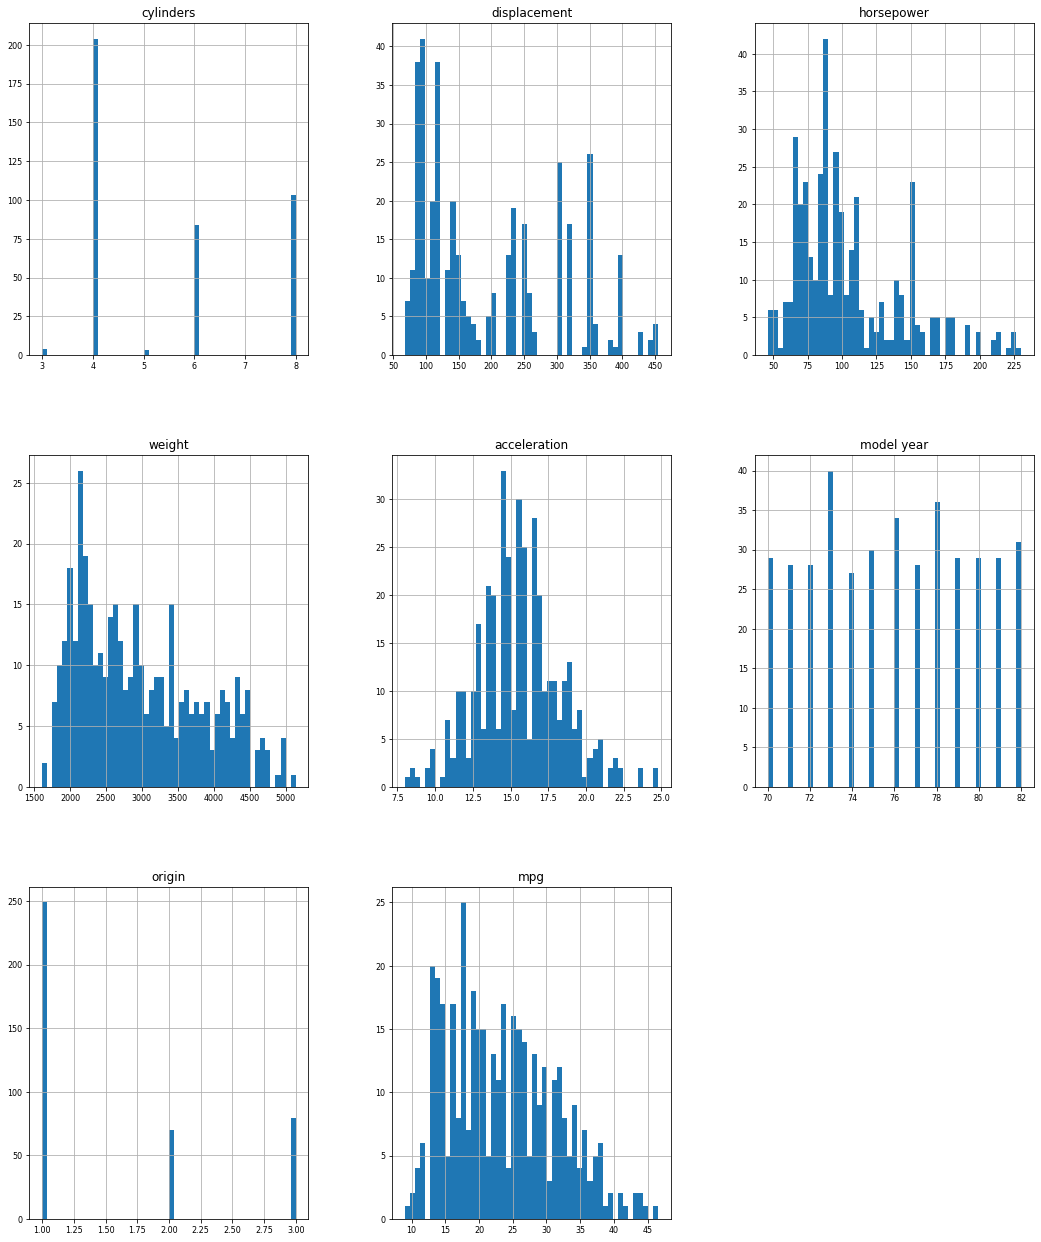

In [ ]:
#dataset_numbers = dataset.select_dtypes(include=['float64'])

#dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
#plt.show()
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

corr

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
cylinders,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,-0.771437
weight,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,0.420289
model year,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,1.000000


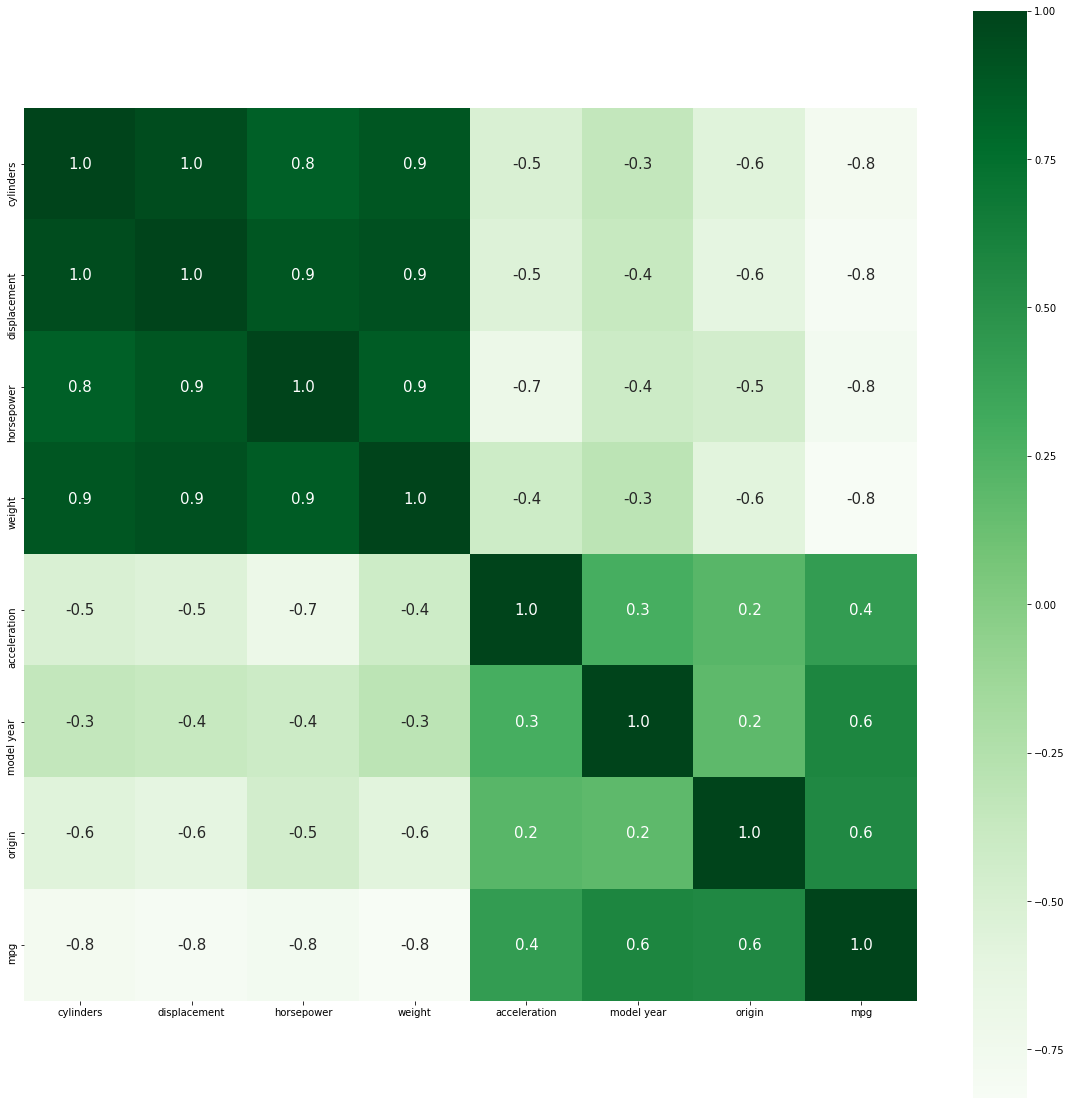

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Linear Regression

### Feature Engineering

In [ ]:
label = dataset['mpg']
feature = dataset.drop(['mpg'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

feature = scaler.fit_transform(feature.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2082842559141632
MAE (Mean Absolute Error) 0.3684300891993139
r^2 score 0.7924612118571435
RMSE (Root Mean Squared Error 0.4563816998020004


### Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9269 - val_loss: 0.8386
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7003 - val_loss: 0.5558
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4152 - val_loss: 0.3314
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2640 - val_loss: 0.2674
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2242 - val_loss: 0.2507
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2059 - val_loss: 0.2354
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1913 - val_loss: 0.2232
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1791 - val_loss: 0.2134
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1697 - val_loss: 0.2058
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1597 - val_loss: 0.1988
Epoch 11/50
40/40 [

In [ ]:
predictions = model.predict(feature_test)
predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1596031332748829
MAE (Mean Absolute Error) 0.3098098343732352
r^2 score 0.8409681004534361
RMSE (Root Mean Squared Error 0.39950360858806133


## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.9812 - val_loss: 0.9613
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.8764 - val_loss: 0.7652
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5638 - val_loss: 0.3848
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2733 - val_loss: 0.2573
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2173 - val_loss: 0.2407
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1997 - val_loss: 0.2263
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1844 - val_loss: 0.2138
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1736 - val_loss: 0.2072
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1608 - val_loss: 0.1961
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1875
Epoch 11/50
40/40 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15488365574836332
MAE (Mean Absolute Error) 0.29828744090585735
r^2 score 0.8456706865525264
RMSE (Root Mean Squared Error 0.3935526086158791


### Wider model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9347 - val_loss: 0.8490
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.6853 - val_loss: 0.5353
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 0.3060
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2300 - val_loss: 0.2467
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1994 - val_loss: 0.2299
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1840 - val_loss: 0.2158
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1708 - val_loss: 0.2012
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1615 - val_loss: 0.1946
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1525 - val_loss: 0.1867
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1464 - val_loss: 0.1814
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15833216263465508
MAE (Mean Absolute Error) 0.30038657762277127
r^2 score 0.8422345221773456
RMSE (Root Mean Squared Error 0.39790974181924105


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.934676,0.849046,0
1,0.685337,0.535322,1
2,0.362853,0.306045,2
3,0.230000,0.246740,3
4,0.199372,0.229861,4
...,...,...,...
95,0.096000,0.153686,95
96,0.097132,0.153256,96
97,0.096079,0.155890,97
98,0.095082,0.157544,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
49,0.105038,0.151747,49
51,0.104525,0.151882,51
78,0.099856,0.152013,78
63,0.102209,0.152052,63
88,0.098950,0.152842,88
...,...,...,...
4,0.199372,0.229861,4
3,0.230000,0.246740,3
2,0.362853,0.306045,2
1,0.685337,0.535322,1


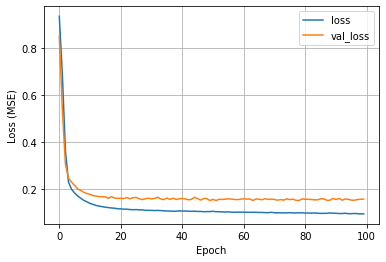

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9464 - val_loss: 0.8907
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.7783 - val_loss: 0.6471
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.4680 - val_loss: 0.3451
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2567 - val_loss: 0.2506
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2078 - val_loss: 0.2290
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1901 - val_loss: 0.2158
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1783 - val_loss: 0.2027
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1682 - val_loss: 0.1944
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1611 - val_loss: 0.1876
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1542 - val_loss: 0.1822
Epoch 11/

In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.101454,0.151361,99
96,0.101291,0.151651,96
91,0.102351,0.151825,91
90,0.102573,0.152267,90
98,0.100899,0.152466,98
...,...,...,...
4,0.207842,0.228987,4
3,0.256682,0.250636,3
2,0.467961,0.345124,2
1,0.778313,0.647082,1


In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8399 - val_loss: 0.6874
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5353 - val_loss: 0.4165
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.3342 - val_loss: 0.2958
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2430 - val_loss: 0.2512
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2049 - val_loss: 0.2337
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1867 - val_loss: 0.2187
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1719 - val_loss: 0.2088
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1602 - val_loss: 0.1973
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1533 - val_loss: 0.1931
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1466 - val_loss: 0.1889
Epoch 11/

In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
75,0.099731,0.144236,75
77,0.100231,0.144681,77
82,0.098958,0.146159,82
66,0.101630,0.146295,66
96,0.097762,0.146728,96
...,...,...,...
4,0.204891,0.233736,4
3,0.243018,0.251203,3
2,0.334224,0.295819,2
1,0.535289,0.416541,1


# Assignments

Lakukan regresi menggunakan MLP dengan dataset **Auto**, **Auto-MPG** dan **Bottle**! Gunakan 2 arsitektur MLP yang mirip seperti diatas beserta linear regression dan simpulkan hasil yang terbaik!

## Catatan:

1. Gunakan ratio training:testing set sebesar 80:20 untuk dataset **Auto & Auto-MPG**, sedangkan untuk dataset **Bottle** gunakan ratio 75:25. Selain itu, gunakan random_state=10 apabila dibutuhkan.

2. Untuk dataset **Auto**, gunakan kolom-kolom ini saja (sisanya di-drop):
  - wheel-base 
  - length 
  - width 
  - height 
  - bore
  - stroke
  - compression-ratio
  - peak-rpm
  - price

3. Untuk dataset **Bottle** lakukan regresi terhadap attribute **Salinity**.

hasil terbaik yang didapatkan dengan metode deeper  learning karena hasil yg didapatkan dengan wiser, loss dan accuracynya kurang dari pada deeper